# Overturning Streamfunction

This draft notebook plots the depth-coordinate, $y$-averaged overturning streamfunction for each model at the end of the Ocean1 and Ocean2 runs.

It also shows how you can open the files in python using Xylar Asay-Davis' Google Drive data file structure: https://drive.google.com/drive/folders/1Bp9oNSIPp_BZvy4ejYI39I-U8DOnonjv

Xylar also has many plotting and data processing scripts, including checking for anomalous data structures.

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
Ocean0_COM = ['COCO/Ocean0-2 COM/Ocean0_COM_COCO.GT002.nc','MITgcm-BAS/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS.nc',
              'MITgcm-JPL/Ocean0-2 COM/Ocean0_COM_MITgcm_JPL.nc','MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean0_COM_MOM6_SIGMA_ZSTAR.nc',
              'NEMO-CNRS/Ocean0-2 COM/Ocean0_COM_NEMO-CNRS.nc', 'POP2x/Ocean0-2 COM/Ocean0_COM_POP2x.nc',
              'FVCOM/Ocean0-2 COM/Ocean0_COM_FVCOM.nc', 'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean0_COM_MITgcm_BAS_Coupled.nc',
              'MOM6/Ocean0-2 COM/Ocean0_COM_MOM6_SIGMA_ZSTAR.nc', 'MPAS-Ocean/Ocean0-2 COM/Ocean0_COM_MPAS-Ocean.nc',
              'NEMO-UKESM1is/Ocean0-2 COM/Ocean0_COM_NEMO-UKESM1is.nc', 'ROMS-UTAS/Ocean0-2 COM/Ocean0_COM_ROMSUTAS.nc']
Ocean1_COM = ['COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc','MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc',
              'MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc','MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc',
              'NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc', 'POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc',
              'FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc', 'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_Coupled.nc',
              'MOM6/Ocean0-2 COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc', 'MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc',
              'ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc']
Ocean2_COM = ['COCO/Ocean0-2 COM/Ocean2_COM_COCO.nc','MITgcm-BAS/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS.nc',
              'MITgcm-JPL/Ocean0-2 COM/Ocean2_COM_MITgcm_JPL.nc', 'MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean2_COM_MOM6_SIGMA_ZSTAR.nc',
              'NEMO-CNRS/Ocean0-2 COM/Ocean2_COM_NEMO-CNRS.nc', 'POP2x/Ocean0-2 COM/Ocean2_COM_POP2x.nc',
              'FVCOM/Ocean0-2 COM/Ocean2_COM_FVCOM.nc', 'MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS_Coupled.nc',
              'MOM6/Ocean0-2 COM/Ocean2_COM_MOM6_SIGMA_ZSTAR.nc', 'MPAS-Ocean/Ocean0-2 COM/Ocean2_COM_MPAS-Ocean.nc',
              'ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc']
# Ocean3_COM = ['MITgcm-JPL/Ocean3-4 COM/Ocean3_COM_MITgcm_JPL.nc', 'NEMO-CNRS/Ocean3-4 COM/Ocean3_COM_NEMO-CNRS.nc',
#               'POP2x/Ocean3-4 COM/Ocean3_COM_POP2x.nc', 'FVCOM/Ocean3-4 COM/Ocean3_COM_FVCOM.nc',
#               'MITgcm_BAS_Coupled/Ocean3-4 COM/Ocean3_COM_MITgcm_BAS_Coupled.nc', 'MOM6/Ocean3-4 COM/Ocean3_COM_MOM6_SIGMA_ZSTAR.nc',
#               'NEMO-UKESM1is/Ocean3-4 COM/Ocean3_COM_NEMO-UKESM1is.nc', 'ROMS-UTAS/Ocean3-4 COM/Ocean3_COM_ROMSUTAS.nc']
# Ocean4_COM = ['MITgcm-JPL/Ocean3-4 COM/Ocean4_COM_MITgcm_JPL.nc', 'NEMO-CNRS/Ocean3-4 COM/Ocean4_COM_NEMO-CNRS.nc',
#               'POP2x/Ocean3-4 COM/Ocean4_COM_POP2x.nc', 'FVCOM/Ocean3-4 COM/Ocean4_COM_FVCOM.nc',
#               'MITgcm_BAS_Coupled/Ocean3-4 COM/Ocean4_COM_MITgcm_BAS_Coupled.nc', 'MOM6/Ocean3-4 COM/Ocean4_COM_MOM6_SIGMA_ZSTAR.nc',
#               'NEMO-UKESM1is/Ocean3-4 COM/Ocean4_COM_NEMO-UKESM1is.nc']

Ocean0_TYP = ['NEMO-CNRS/Ocean0-2 TYP/TYPa/Ocean0_TYPa_NEMO-CNRS.nc', 'NEMO-CNRS/Ocean0-2 TYP/TYPb/Ocean0_TYPb_NEMO-CNRS.nc',
              'POP2x/Ocean0-2 TYP/Ocean0_TYP_POP2x.nc', 'FVCOM/Ocean0-2 TYP/Ocean0_TYP_FVCOM.nc',
              'MOM6/Ocean0-2 TYP/Ocean0_TYP_MOM6.nc', 'MPAS-Ocean/Ocean0-2 TYP/Ocean0_TYP_MPAS-Ocean.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean0_TYP_NEMO-UKESM1is.nc', 'ROMS-UTAS/Ocean0-2 TYP/Ocean0_TYP_ROMSUTAS.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean0_TYP_tides_ROMSUTAS.nc']
Ocean1_TYP = ['NEMO-CNRS/Ocean0-2 TYP/TYPa/Ocean1_TYPa_NEMO-CNRS.nc', 'POP2x/Ocean0-2 TYP/Ocean1_TYP_POP2x.nc',
              'FVCOM/Ocean0-2 TYP/Ocean1_TYP_FVCOM.nc', 'MOM6/Ocean0-2 TYP/Ocean1_TYP_MOM6.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean1_TYP_NEMO-UKESM1is.nc', 'ROMS-UTAS/Ocean0-2 TYP/Ocean1_TYP_ROMSUTAS.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean1_TYP_tides_ROMSUTAS.nc']
Ocean2_TYP = ['NEMO-CNRS/Ocean0-2 TYP/TYPa/Ocean2_TYPa_NEMO-CNRS.nc', 'POP2x/Ocean0-2 TYP/Ocean2_TYP_POP2x.nc',
              'FVCOM/Ocean0-2 TYP/Ocean2_TYP_FVCOM.nc', 'MOM6/Ocean0-2 TYP/Ocean2_TYP_MOM6.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean2_TYP_NEMO-UKESM1is.nc', 'ROMS-UTAS/Ocean0-2 TYP/Ocean2_TYP_ROMSUTAS.nc',
              'ROMS-UTAS/Ocean0-2 TYP/Ocean2_TYP_tides_ROMSUTAS.nc']
# Ocean3_TYP = ['NEMO-CNRS/Ocean3-4 - TYP/Ocean3_TYPb_NEMO-CNRS.nc', 'POP2x/Ocean3-4 TYP/Ocean3_TYP_POP2x.nc', 
#               'NEMO-UKESM1is/Ocean3-4 TYP/Ocean3_TYP_NEMO-UKESM1is.nc']
# Ocean4_TYP = ['NEMO-CNRS/Ocean3-4 - TYP/Ocean4_TYPb_NEMO-CNRS.nc', 'POP2x/Ocean3-4 TYP/Ocean4_TYP_POP2x.nc',
#               'NEMO-UKESM1is/Ocean3-4 TYP/Ocean4_TYP_NEMO-UKESM1is.nc']


In [3]:
# folder where I have downloaded the data
base_folder = '/g/data/x77/cy8964/ISOMIP+Data/'

# Overturning Streamfunction

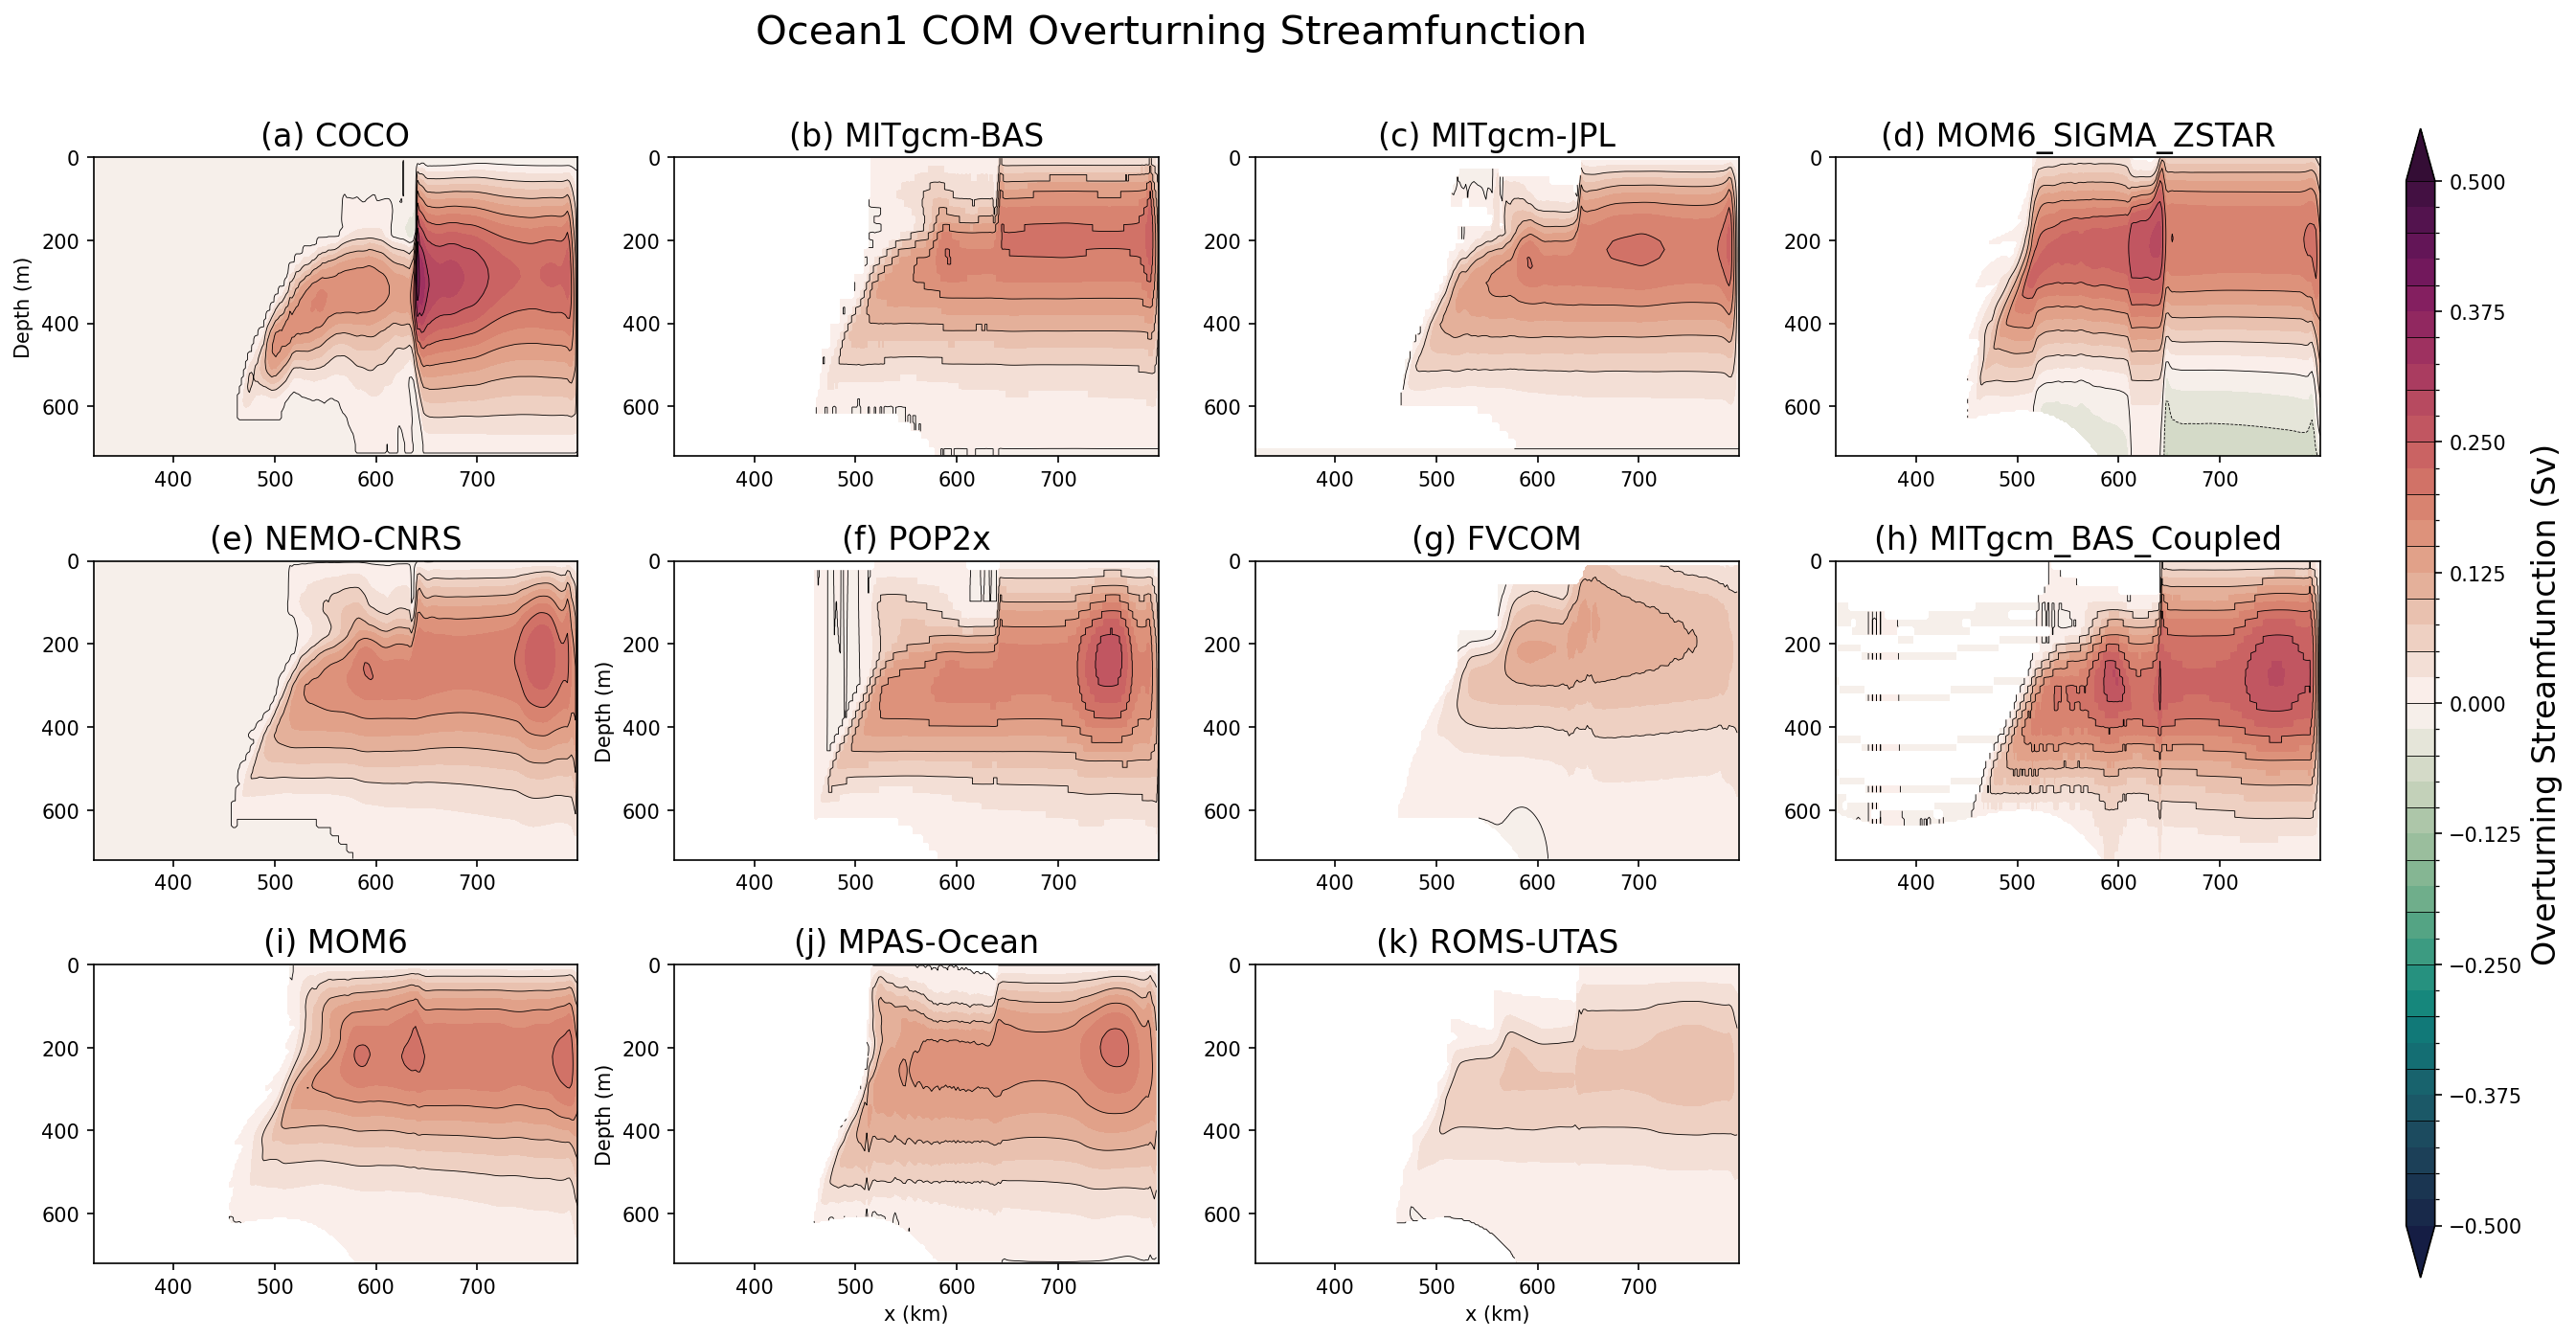

In [4]:
expt = Ocean1_COM
labels = [s[:s.find('/')] for s in expt]
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 240
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(base_folder+expt[i], decode_times=False)
    mr = data.overturningStreamfunction.isel(nTime = np.arange(time-13,time)).mean('nTime')
    # last year of time
    mr['nz'] = mr.nz*5+2.5 # add depth (2.5,7.5 etc)
    mr['nx'] = mr.nx*2+321
    # mr<1e10 is to get rid of NaNs.
    c = (mr.where(mr < 1e10)/1e6).plot.contourf(cmap = cm.cm.curl, levels = np.linspace(-0.5,0.5,41),extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    ls = (mr.where(mr < 1e10)/1e6).plot.contour( levels = np.linspace(-0.5,0.5,21), colors = 'k', linewidths = 0.4)
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==5) or (i==9):
        plt.ylabel('Depth (m)')
    else:
        plt.ylabel('')
    if i>=9:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')
    plt.ylim(720,0)

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Overturning Streamfunction (Sv)', fontsize = 16)
cbar.add_lines(ls)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM Overturning Streamfunction', fontsize = 20);

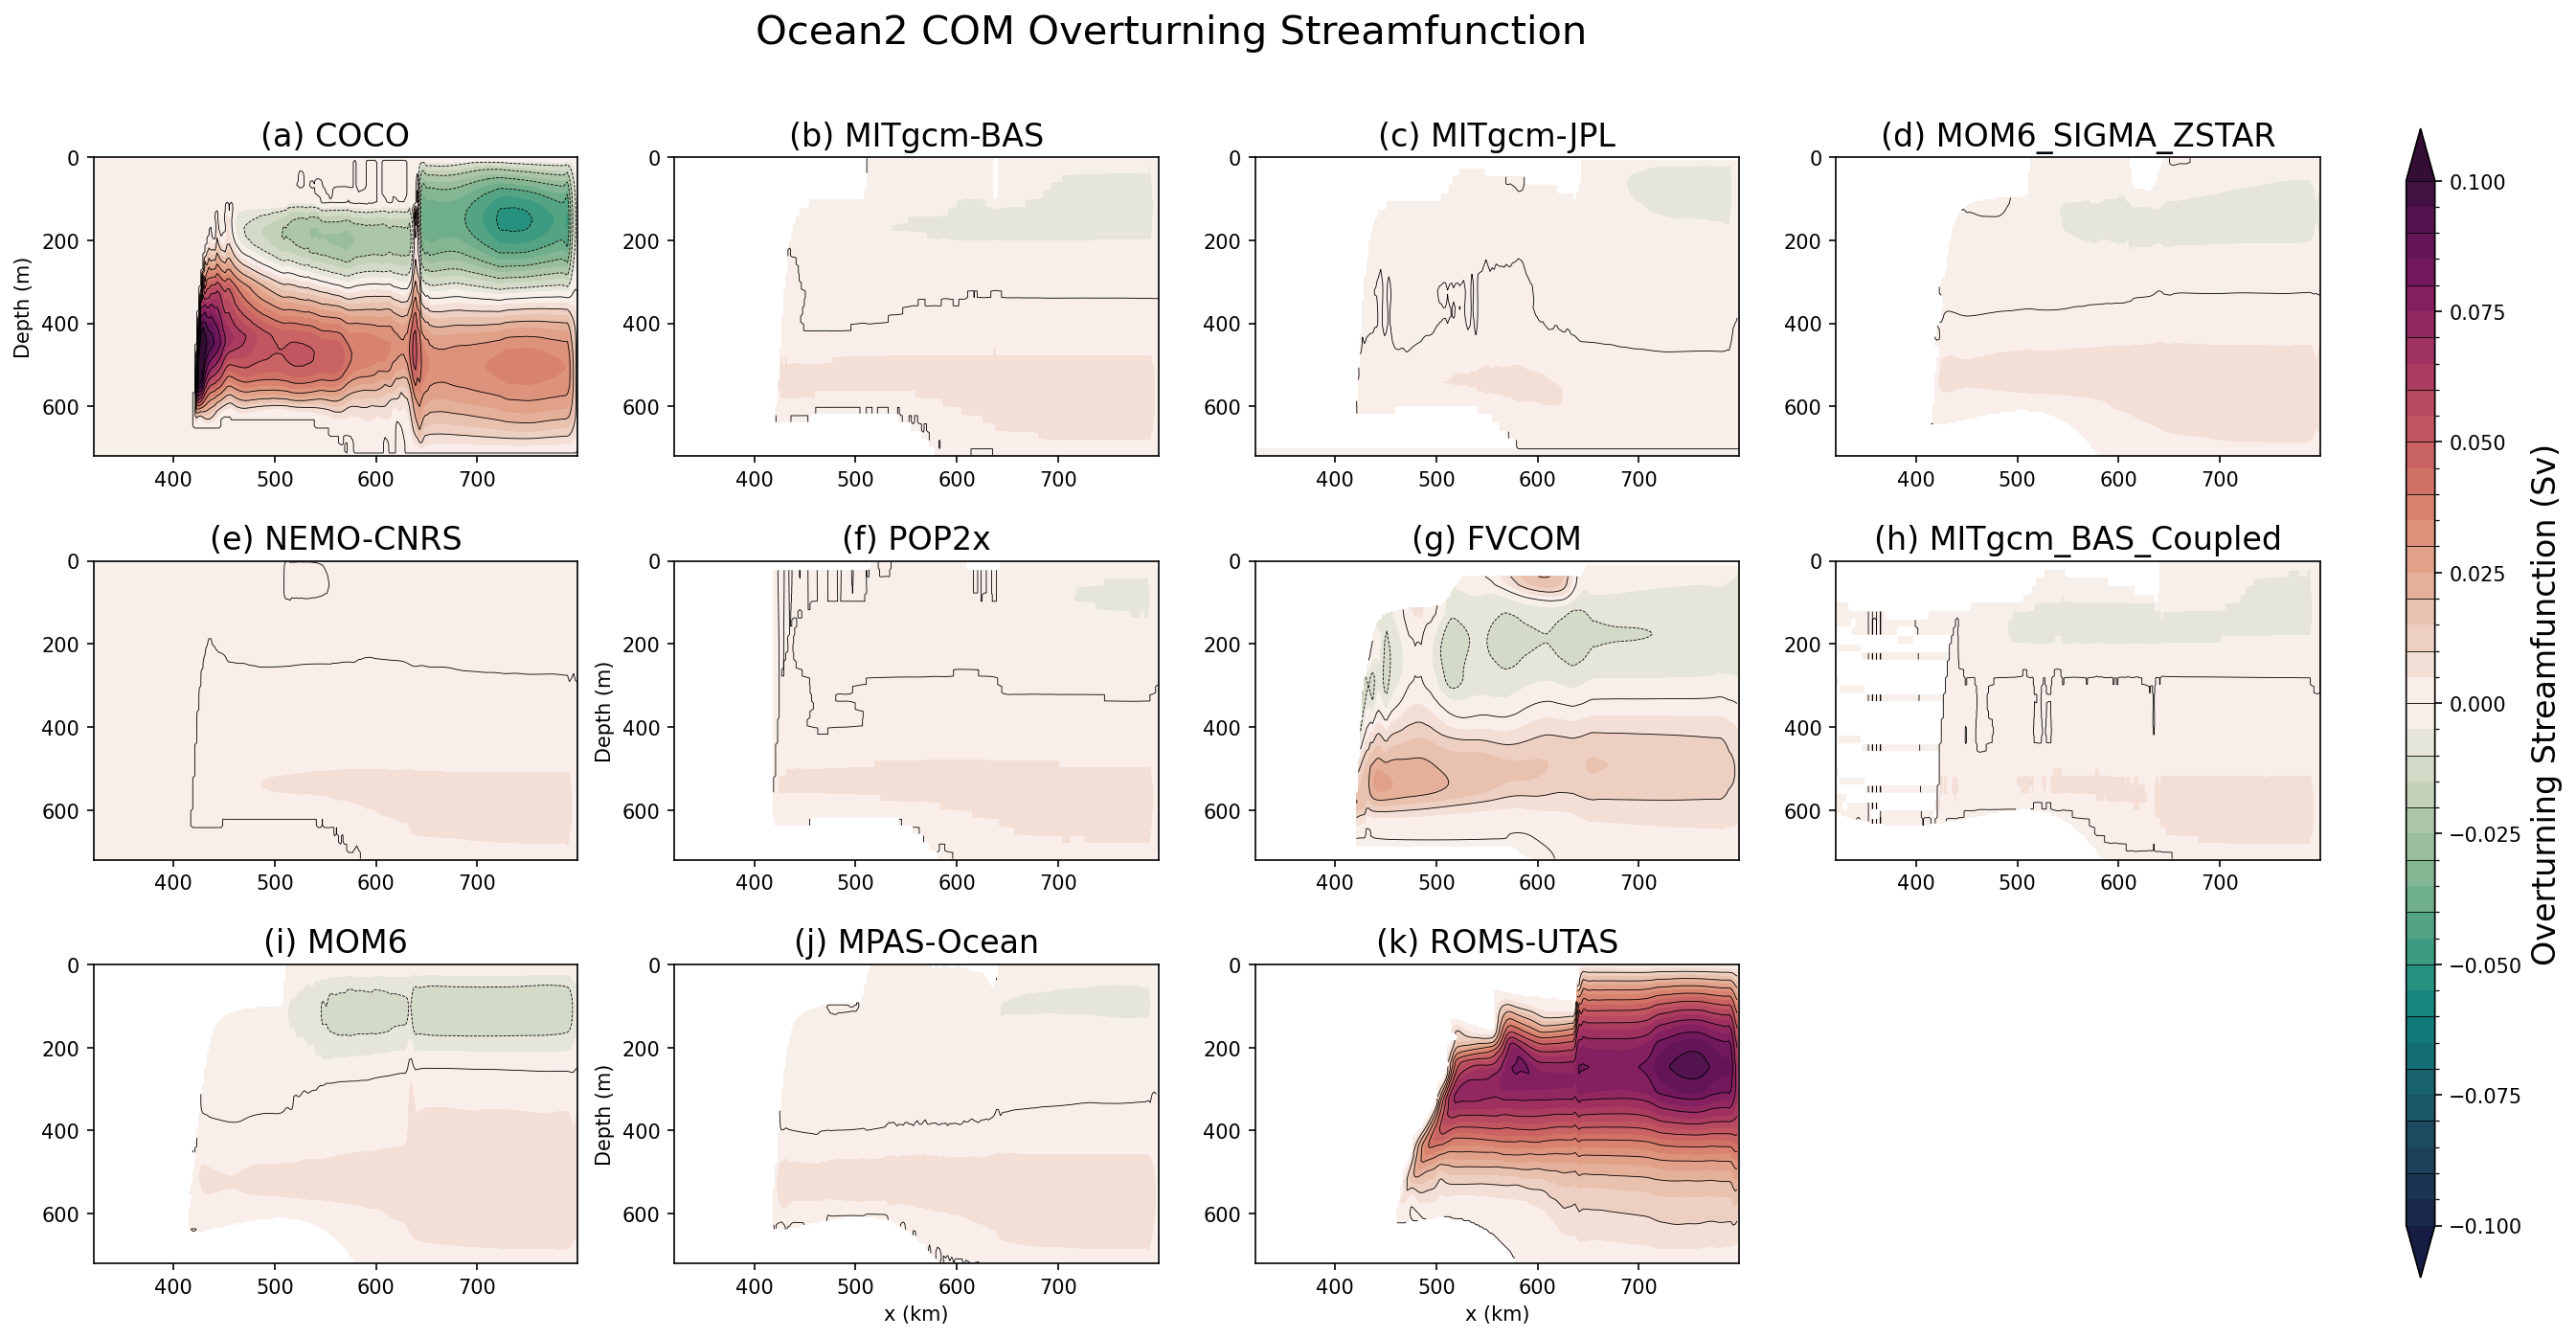

In [5]:
expt = Ocean2_COM
labels = [s[:s.find('/')] for s in expt]
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 240
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(base_folder+expt[i], decode_times=False)
    mr = data.overturningStreamfunction.isel(nTime = np.arange(time-13,time)).mean('nTime')
    # last year of time
    mr['nz'] = mr.nz*5+2.5 # add depth (2.5,7.5 etc)
    mr['nx'] = mr.nx*2+321
    # mr<1e10 is to get rid of NaNs.
    c = (mr.where(mr < 1e10)/1e6).plot.contourf(cmap = cm.cm.curl, levels = np.linspace(-0.1,0.1,41),extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    ls = (mr.where(mr < 1e10)/1e6).plot.contour( levels = np.linspace(-0.1,0.1,21), colors = 'k', linewidths = 0.4)
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==5) or (i==9):
        plt.ylabel('Depth (m)')
    else:
        plt.ylabel('')
    if i>=9:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')
    plt.ylim(720,0)

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Overturning Streamfunction (Sv)', fontsize = 16)
cbar.add_lines(ls)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean2 COM Overturning Streamfunction', fontsize = 20);